## Manipulating radar data
    Date: July 4, 2022
    Example Notebook
    Keywords: NEXRAD data, pyart, cartopy, gridding radar data, xarray, matplotlib
    Author: Hamid A. Syed
    Advisor: Prof. Dan Dawson
    Email: syed44@purdue.edu

### Let's install some necessary packages
    Open the bell terminal and load your environment, if you created any;
        1. conda update --all
        2. conda install -c conda-forge arm_pyart wradlib metpy
    These packages have lot of dependencies, so these will automatically install other packages (e.g., Xarray, Cartopy etc.)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import xarray as xr
import glob
import os
import pyart
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeat
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
# plt.rcParams['image.cmap'] = 'seismic'
plt.rcParams['axes.linewidth'] = 2


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
nexrad_dir = "/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/"

In [3]:
#Radars available 
os.listdir(nexrad_dir+'/IOP2')

['KDGX',
 'KLCH',
 'KPAH',
 'KGWX',
 'KPOE',
 'KNQA',
 'KHTX',
 '.DS_Store',
 'KLZK',
 'KSHV',
 'KBMX']

### Let's create a function to search for the data

In [4]:
def load_data(datetime):
    '''datetime:str ('20220331')'''
    nexrad_dir = "/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/"
    data_files = []
    for iop in ["IOP1", "IOP2", "IOP3", "IOP4"]:
        for radar_name in ["KBMX","KDGX","KGWX","KHTX","KLCH","KLZK","KNQA","KPAH","KPOE","KSHV"]:
            data_files.extend(sorted(glob.glob(nexrad_dir+iop+'/'+radar_name+"/" +"*"+datetime+"*")))
    print("Available files: ", len(data_files))
    for file in data_files:
        print(file.split("/")[-1])
    return data_files
# load_data("20220331", "1338")

In [5]:
# This is not a good way to retrieve the data from directories, but I guess it should work for now

In [6]:
load_data("20220331_02101")

Available files:  1
KGWX20220331_021011_V06.nc


['/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP2/KGWX/KGWX20220331_021011_V06.nc']

### Now we have created a function which can help searching for the nearest data available in a directory
    It takes a string of datetime argument like "20220331_235959" or  "20220331_235" if we are not
    sure about the time

In [76]:
load_data("20220331_021")

Available files:  13
KBMX20220331_021530_V06.nc
KDGX20220331_021030_V06.nc
KDGX20220331_021724_V06.nc
KGWX20220331_021011_V06.nc
KGWX20220331_021712_V06.nc
KHTX20220331_021340_V06.nc
KLCH20220331_021436_V06.nc
KLZK20220331_021521_V06.nc
KNQA20220331_021514_V06.nc
KPAH20220331_021030_V06.nc
KPAH20220331_021629_V06.nc
KPOE20220331_021141_V06.nc
KSHV20220331_021753_V06.nc


['/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP2/KBMX/KBMX20220331_021530_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP2/KDGX/KDGX20220331_021030_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP2/KDGX/KDGX20220331_021724_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP2/KGWX/KGWX20220331_021011_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP2/KGWX/KGWX20220331_021712_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP2/KHTX/KHTX20220331_021340_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP2/KLCH/KLCH20220331_021436_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP2/KLZK/KLZK20220331_021521_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP2/KNQA/KNQA20220331_021514_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP2/KPAH/KPAH20220331_021030_V06.nc',
 '/depot/dawson29/da

###  there are many files available for the given time, we can narrow down our search as follows 

In [78]:
filenames = load_data("20220331_0210")

Available files:  3
KDGX20220331_021030_V06.nc
KGWX20220331_021011_V06.nc
KPAH20220331_021030_V06.nc


### Now we can read the data using Py-Art

In [79]:
radar = pyart.io.read(filenames[0])

In [80]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	units: meters
	standard_name: Altitude
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float64 and shape: (12240,)>
	long_name: azimuth_angle_from_true_north
	units: degrees
	standard_name: beam_azimuth_angle
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (12240,)>
	long_name: elevation_angle_from_horizontal_plane
	units: degrees
	standard_name: beam_elevation_angle
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	differential_reflectivity:
		data: <ndarray of type: float32 and shape: (12240, 1832)>
		_FillValue: -9999.0
		long_name: log_differential_reflectivity_hv
		units: dB
		standard_name: log_differential_reflectivity_hv
		valid_max: 7.9375
		valid_min: -7.875
		coordinates: elevation azimuth range
	spectru

In [81]:
radar.fields.keys()

dict_keys(['differential_reflectivity', 'spectrum_width', 'velocity', 'reflectivity', 'cross_correlation_ratio', 'differential_phase', 'clutter_filter_power_removed'])

### Let's visualize the data

In [82]:
display = pyart.graph.RadarMapDisplay(radar)

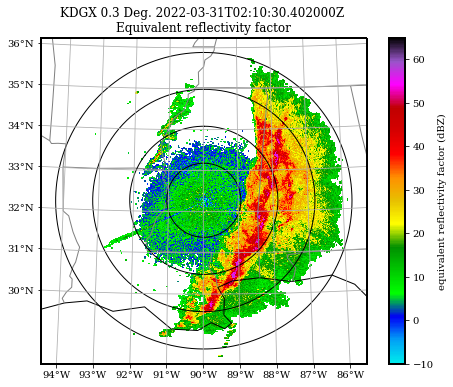

In [83]:
fig = plt.figure(figsize=[8,6])
display.plot_ppi_map(field='reflectivity', sweep=0, vmin=-10, vmax = 65, cmap='pyart_NWSRef',)
display.plot_range_rings([100, 200, 300, 400], lw=1)

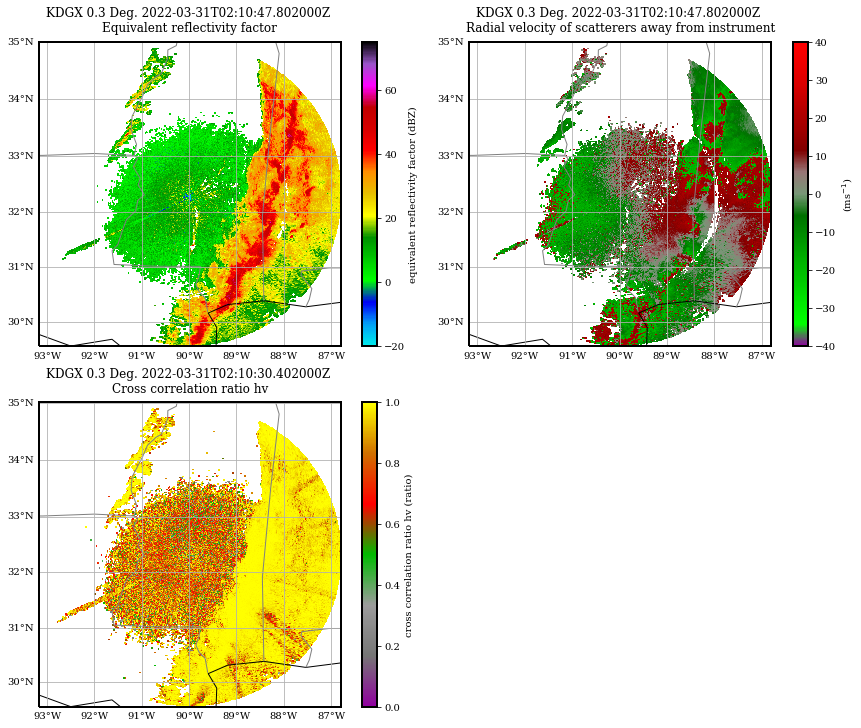

In [84]:
tilt = 1
lats, lons, alt = radar.get_gate_lat_lon_alt(0)
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize=[12,10], constrained_layout=True)
ax0 = plt.subplot(221, projection=ccrs.Mercator())
display.plot_ppi_map("reflectivity", sweep=tilt, vmin=-20, vmax=75, cmap="pyart_NWSRef", ax=ax0)
ax1 = plt.subplot(222, projection=ccrs.Mercator())
display.plot_ppi_map('velocity', sweep=tilt, vmin=-40, vmax=40, colorbar_label='(ms$^{-1}$)',
             cmap=pyart.graph.cm.NWSVel, ax=ax1)
ax2 = plt.subplot(223, projection=ccrs.Mercator())
display.plot_ppi_map("cross_correlation_ratio",sweep=0,vmin=0,vmax=1, cmap="pyart_NWS_SPW", ax=ax2)
for ax in [ax0, ax1, ax2]:
    ax.set_extent([lons.min()+1.7, lons.max()-1.7, lats.min()+1.4, lats.max()-1.4])
    ax.set_aspect("equal")

### We can transform the polar data into cartesian grids using using Py-Art

In [85]:
# create a gatexfilter so that the artefacts would be dropped while gridding process
KBMX_f = pyart.filters.GateFilter(radar)
KBMX_f.exclude_masked('reflectivity')
KBMX_f.exclude_invalid('reflectivity')
KBMX_f.exclude_below('reflectivity', -10)

#### pyart.map.grid_from_radars( ) function takes first argument as radar object, and then the desired shape of the 3 dimensional array, here I have used 40 for vertical z dimesion, 500 for x and y horizontals. Then the third argument is is the lenth (m) for the z, y and x dimensions from the radar

In [86]:
grid = pyart.map.grid_from_radars(radar,(40,500,500),
                   ((0.,20000.),(-400000.,400000.),(-400000.,400000.)), 
                                   weighting_function='Barnes2',
                                  fields=['reflectivity'],
                                  gatefilters=(KBMX_f))

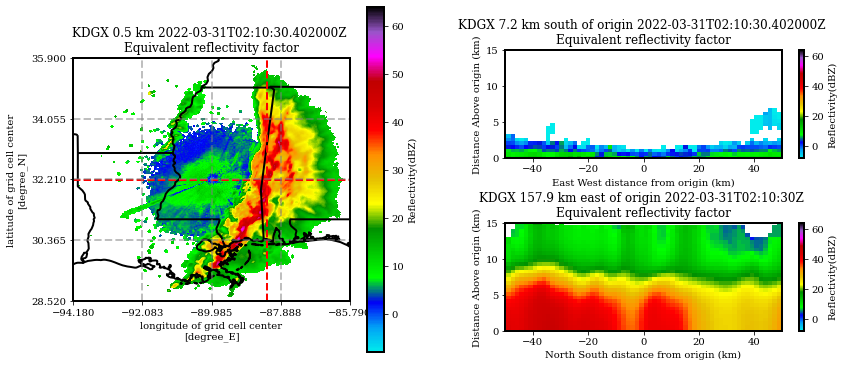

In [105]:
display = pyart.graph.GridMapDisplay(grid)

# Setting projection, figure size, and panel sizes.
projection = ccrs.PlateCarree()

fig = plt.figure(figsize=[12, 6])

map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# Set parameters.
level = 1
vmin = -8
vmax = 64
lat = 32.2
lon = -88.3

# Panel 1: PPI plot of the second tilt.
ax1 = fig.add_axes(map_panel_axes, projection=projection)
display.plot_grid('reflectivity', 1, vmin=vmin, vmax=vmax,
                  ax=ax1,
                  projection=projection,
                  cmap='pyart_NWSRef')
display.plot_crosshairs(lon=lon, lat=lat)

# Panel 2: longitude slice
ax2 = fig.add_axes(x_cut_panel_axes)
display.plot_longitude_slice('reflectivity', lon=lon, lat=lat,
                             ax=ax2,
                             vmin=vmin, vmax=vmax,
                             cmap='pyart_NWSRef')

ax2.set_ylim([0, 15])
ax2.set_xlim([-50, 50])

# Panel 3: latitude slice
ax3 = fig.add_axes(y_cut_panel_axes)
display.plot_latitude_slice('reflectivity', lon=lon, lat=lat,
                            ax=ax3,
                            vmin=vmin, vmax=vmax,
                            cmap='pyart_NWSRef')
ax3.set_ylim([0, 15])
ax3.set_xlim([-50, 50])

plt.show()

In [88]:
## We Can also directly convert it to xarray dataset

In [89]:
xg = grid.to_xarray()

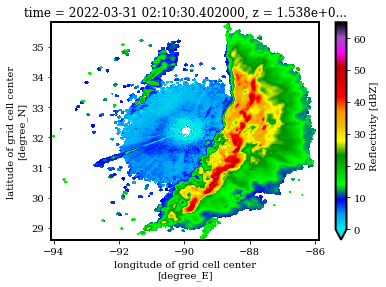

In [90]:
xg['reflectivity'][0, 3].plot.pcolormesh(vmin = 0, vmax = 65, cmap='pyart_NWSRef', x = 'lon', y = 'lat')

### Now that we have transformed the data, we can also add boundary lines, states, lakes, etc. to the plots using cartopy
    We will create a function to do so 

In [20]:
def decorat(ax,t=False,b=False,l=False,r=False):
    ax.coastlines()
    ax.add_feature(cfeat.STATES, alpha= 0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, alpha=0.5, 
                         linestyle='--', draw_labels=True)
    gl.xlabels_top = t
    gl.ylabels_left = l
    gl.ylabels_right=r
    gl.xlabels_bottom = b
    gl.xlines = False
    gl.ylines = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'weight': 'light','family':'serif'}
    gl.ylabel_style = {'weight': 'light','family':'serif'}

In [92]:
# Lets plot the gridded reflectivity again with state boundaries

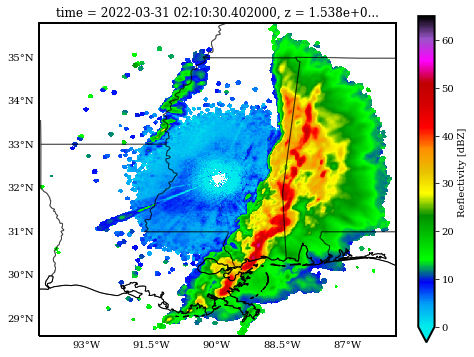

In [93]:
fig = plt.figure(figsize=[8, 6])
ax = plt.axes(projection = ccrs.PlateCarree())
xg['reflectivity'][0, 3].plot.pcolormesh(vmin = 0, vmax = 65, cmap='pyart_NWSRef', x = 'lon', y = 'lat')
decorat(ax = ax, b=True, l=True)

### Composite reflectivity

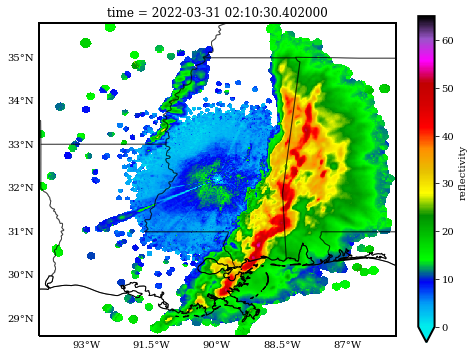

In [94]:
fig = plt.figure(figsize=[8, 6])
ax = plt.axes(projection = ccrs.PlateCarree())
xg['reflectivity'][0].max(dim='z').plot.pcolormesh(vmin = 0, vmax = 65, cmap='pyart_NWSRef', x = 'lon', y = 'lat')
decorat(ax = ax, b=True, l=True)

### Hovmöller Plots

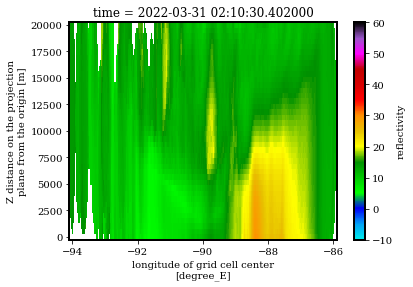

In [95]:
xg.reflectivity[0].mean("y").plot(x='lon', y='z', cmap='pyart_NWSRef',vmin = -10, vmax = 60)

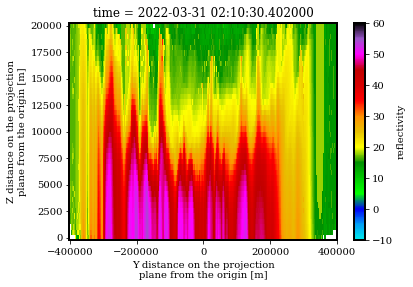

In [96]:
xg.reflectivity[0].max("x").plot(x='y', y='z', cmap='pyart_NWSRef',vmin = -10, vmax = 60)

### Latitudinal/Longitudinal slices

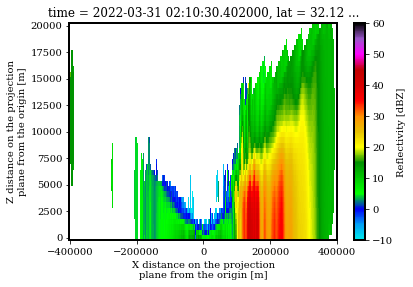

In [97]:
xg.reflectivity[0].sel(y=-10000, method='nearest').plot(cmap='pyart_NWSRef',vmin = -10, vmax = 60)

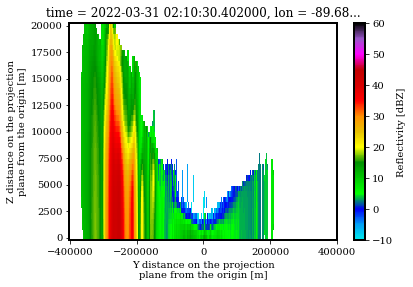

In [109]:
xg.reflectivity[0].sel(x=30000, method='nearest').plot(cmap='pyart_NWSRef',vmin = -10, vmax = 60)

## You can also merge multiple radars

#### Remember we created a function for loading the data, let's retrieve some files

In [7]:
filenames = load_data("20220331_0210")

Available files:  3
KDGX20220331_021030_V06.nc
KGWX20220331_021011_V06.nc
KPAH20220331_021030_V06.nc


In [8]:
radar1 = pyart.io.read(filenames[0])
radar2 = pyart.io.read(filenames[1])
radar3 = pyart.io.read(filenames[2])
grid = pyart.map.grid_from_radars([radar1,radar2,radar3],(40,500,500),
               ((0.,20000.),(-400000.,400000.),(-400000.,400000.)), 
                               weighting_function='Barnes2',
                              fields=['reflectivity'])
del radar1, radar2, radar3

In [88]:
xgrid = grid.to_xarray()

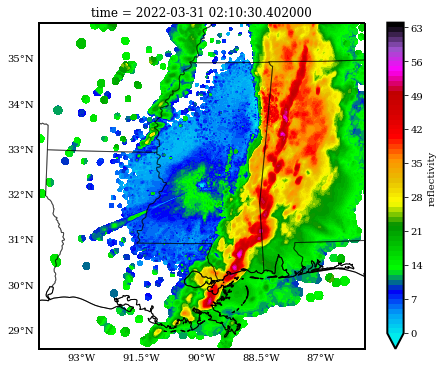

In [89]:
fig = plt.figure(figsize=[8, 6])
ax = plt.axes(projection = ccrs.LambertAzimuthalEqualArea(grid.origin_longitude['data'][0], 
                                                          grid.origin_latitude['data'][0]))
xgrid['reflectivity'][0].max("z").plot.contourf(cmap='pyart_NWSRef',levels = range(0, 65))
decorat(ax = ax, b=True, l=True)

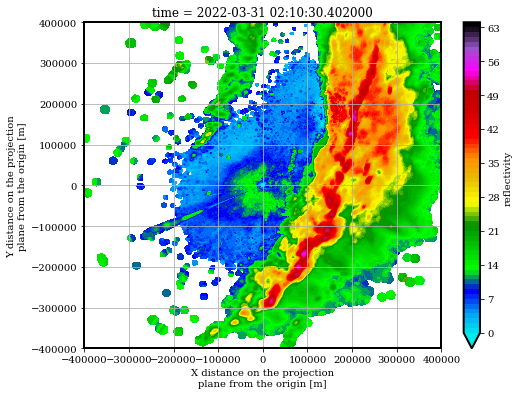

In [90]:
fig = plt.figure(figsize=[8, 6])
ax = plt.axes()
xgrid['reflectivity'][0].max("z").plot.contourf(cmap='pyart_NWSRef',levels = range(0, 65))
ax.grid()

In [91]:
## What if we want to select a particular region?

In [92]:
##Slicing with distance

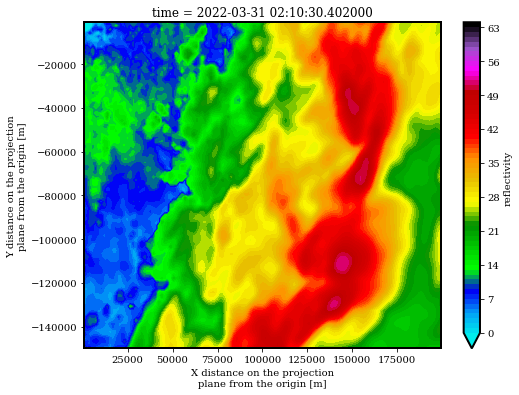

In [95]:
fig = plt.figure(figsize=[8, 6])
ax = plt.axes()
xgrid['reflectivity'][0].max("z").sel(x=slice(0, 20e4), 
                                      y= slice(-15e4, 0)
                                     ).plot.contourf(cmap='pyart_NWSRef', 
                                                     levels = range(0, 65))

In [81]:
## Slicing with geo coordinates

In [96]:
xgrid = xgrid.swap_dims({"x":"lon", "y":"lat"})

In [100]:
## Adding patches/Highlighting regions

In [101]:
import matplotlib.patches as mpatches

In [102]:
## Lets say we want to plot only the highlighted region shown below

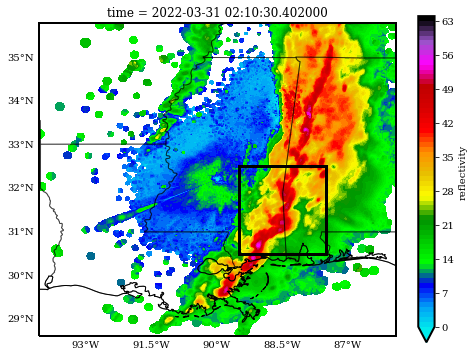

In [157]:
fig = plt.figure(figsize=[8, 6])
ax = plt.axes(projection = ccrs.PlateCarree())
xgrid.reflectivity[0].max("z").plot.contourf(cmap='pyart_NWSRef',levels = range(0, 65))
decorat(ax, l=True, b=True)
ax.add_patch(mpatches.Rectangle(xy=[-90+(1/2), 30+(1/2)], width=2, height=2,
                                facecolor='none',
                                ec = "k",
                                lw=3,
                                transform=ccrs.PlateCarree())
             )


In [165]:
small_grid = xgrid.reflectivity[0].sel(lon = slice(-90, -87), 
                          lat = slice(30.5, 32.5)
                         )

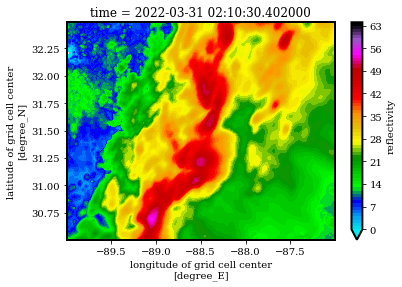

In [167]:
small_grid.max("z").plot.contourf(cmap='pyart_NWSRef',
                                                   levels = range(0, 65))

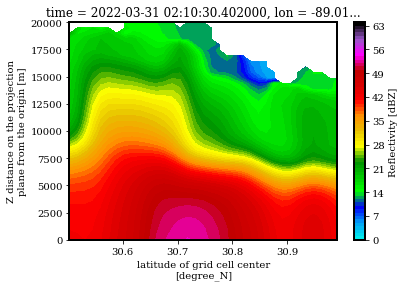

In [197]:
small_grid.sel(lon = -89.0, method = 'nearest').sel(lat = slice(30, 31)).plot.contourf(cmap='pyart_NWSRef',
                                                   levels = range(0, 65))